In [ ]:
# Import all required packages

import pandas as pd
import numpy as np
import math
import matplotlib.pylab as plt
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Read the data file
delays_df = pd.read_csv("FlightDelays.csv")

# Data transformation and cleaning

In [ ]:
# Review the characteristics of the dataset
delays_df

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
0,1455,OH,1455,JFK,184,01/01/2004,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,01/01/2004,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,01/01/2004,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,01/01/2004,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,01/01/2004,7792,IAD,0,4,1,N698BR,ontime
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,645,RU,644,EWR,199,1/31/2004,2761,DCA,0,6,31,N15555,ontime
2197,1700,RU,1653,EWR,213,1/31/2004,2497,IAD,0,6,31,N16976,ontime
2198,1600,RU,1558,EWR,199,1/31/2004,2361,DCA,0,6,31,N14902,ontime
2199,1359,RU,1403,EWR,199,1/31/2004,2216,DCA,0,6,31,N16961,ontime


In [ ]:
delays_df.describe()

,CRS_DEP_TIME,DEP_TIME,DISTANCE,FL_NUM,Weather,DAY_WEEK,DAY_OF_MONTH
count,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000
mean,1371.938664,1369.298955,211.871422,3815.086324,0.014539,3.905498,16.024989
std,432.697149,442.462754,13.316815,2409.750224,0.119725,1.903149,8.677390
min,600.000000,10.000000,169.000000,746.000000,0.000000,1.000000,1.000000
25%,1000.000000,1004.000000,213.000000,2156.000000,0.000000,2.000000,8.000000
50%,1455.000000,1450.000000,214.000000,2385.000000,0.000000,4.000000,16.000000
75%,1710.000000,1709.000000,214.000000,6155.000000,0.000000,5.000000,23.000000
max,2130.000000,2330.000000,229.000000,7924.000000,1.000000,7.000000,31.000000


In [ ]:
# Rename Flight Status column to remove the space to avoid unnecessary error
delays_df = delays_df.rename(columns={'Flight Status':'FLIGHT_STATUS'})

delays_df

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,FLIGHT_STATUS
0,1455,OH,1455,JFK,184,01/01/2004,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,01/01/2004,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,01/01/2004,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,01/01/2004,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,01/01/2004,7792,IAD,0,4,1,N698BR,ontime
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,645,RU,644,EWR,199,1/31/2004,2761,DCA,0,6,31,N15555,ontime
2197,1700,RU,1653,EWR,213,1/31/2004,2497,IAD,0,6,31,N16976,ontime
2198,1600,RU,1558,EWR,199,1/31/2004,2361,DCA,0,6,31,N14902,ontime
2199,1359,RU,1403,EWR,199,1/31/2004,2216,DCA,0,6,31,N16961,ontime


In [ ]:
pd.DataFrame({'length' : len(delays_df),'miss.val': delays_df.isnull().sum(),})

,length,miss.val
CRS_DEP_TIME,2201,0
CARRIER,2201,0
DEP_TIME,2201,0
DEST,2201,0
DISTANCE,2201,0
FL_DATE,2201,0
FL_NUM,2201,0
ORIGIN,2201,0
Weather,2201,0
DAY_WEEK,2201,0


In [ ]:
# column to see delay in minutes
# negative = flight departs earlier, positive = flight departs later than scheduled
delays_df['dep_delay_in_min'] = delays_df['DEP_TIME'] - delays_df['CRS_DEP_TIME']

delays_df[delays_df['FLIGHT_STATUS'] == 'delayed']

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,FLIGHT_STATUS,dep_delay_in_min
53,1455,DH,1531,LGA,229,01/02/2004,7211,IAD,0,5,2,N665BR,delayed,76
56,1039,DH,1236,LGA,229,01/02/2004,7792,IAD,0,5,2,N665BR,delayed,197
62,2120,DH,2305,JFK,228,01/02/2004,7814,IAD,0,5,2,N657BR,delayed,185
96,1245,DH,1350,EWR,213,01/02/2004,7303,IAD,0,5,2,N686BR,delayed,105
97,1430,DH,1512,EWR,213,01/02/2004,7307,IAD,0,5,2,N309UE,delayed,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2146,1525,RU,1601,EWR,199,1/30/2004,2261,DCA,0,5,30,N13979,delayed,76
2149,1500,RU,1456,EWR,213,1/30/2004,2156,IAD,0,5,30,N21144,delayed,-44
2150,700,RU,659,EWR,213,1/30/2004,2855,IAD,0,5,30,N11121,delayed,-41
2156,840,DH,931,JFK,228,1/31/2004,7800,IAD,0,6,31,N655BR,delayed,91


In [ ]:
delays_df[delays_df['FLIGHT_STATUS'] == 'ontime']

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,FLIGHT_STATUS,dep_delay_in_min
0,1455,OH,1455,JFK,184,01/01/2004,5935,BWI,0,4,1,N940CA,ontime,0
1,1640,DH,1640,JFK,213,01/01/2004,6155,DCA,0,4,1,N405FJ,ontime,0
2,1245,DH,1245,LGA,229,01/01/2004,7208,IAD,0,4,1,N695BR,ontime,0
3,1715,DH,1709,LGA,229,01/01/2004,7215,IAD,0,4,1,N662BR,ontime,-6
4,1039,DH,1035,LGA,229,01/01/2004,7792,IAD,0,4,1,N698BR,ontime,-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,645,RU,644,EWR,199,1/31/2004,2761,DCA,0,6,31,N15555,ontime,-1
2197,1700,RU,1653,EWR,213,1/31/2004,2497,IAD,0,6,31,N16976,ontime,-47
2198,1600,RU,1558,EWR,199,1/31/2004,2361,DCA,0,6,31,N14902,ontime,-42
2199,1359,RU,1403,EWR,199,1/31/2004,2216,DCA,0,6,31,N16961,ontime,44


# Data visualization

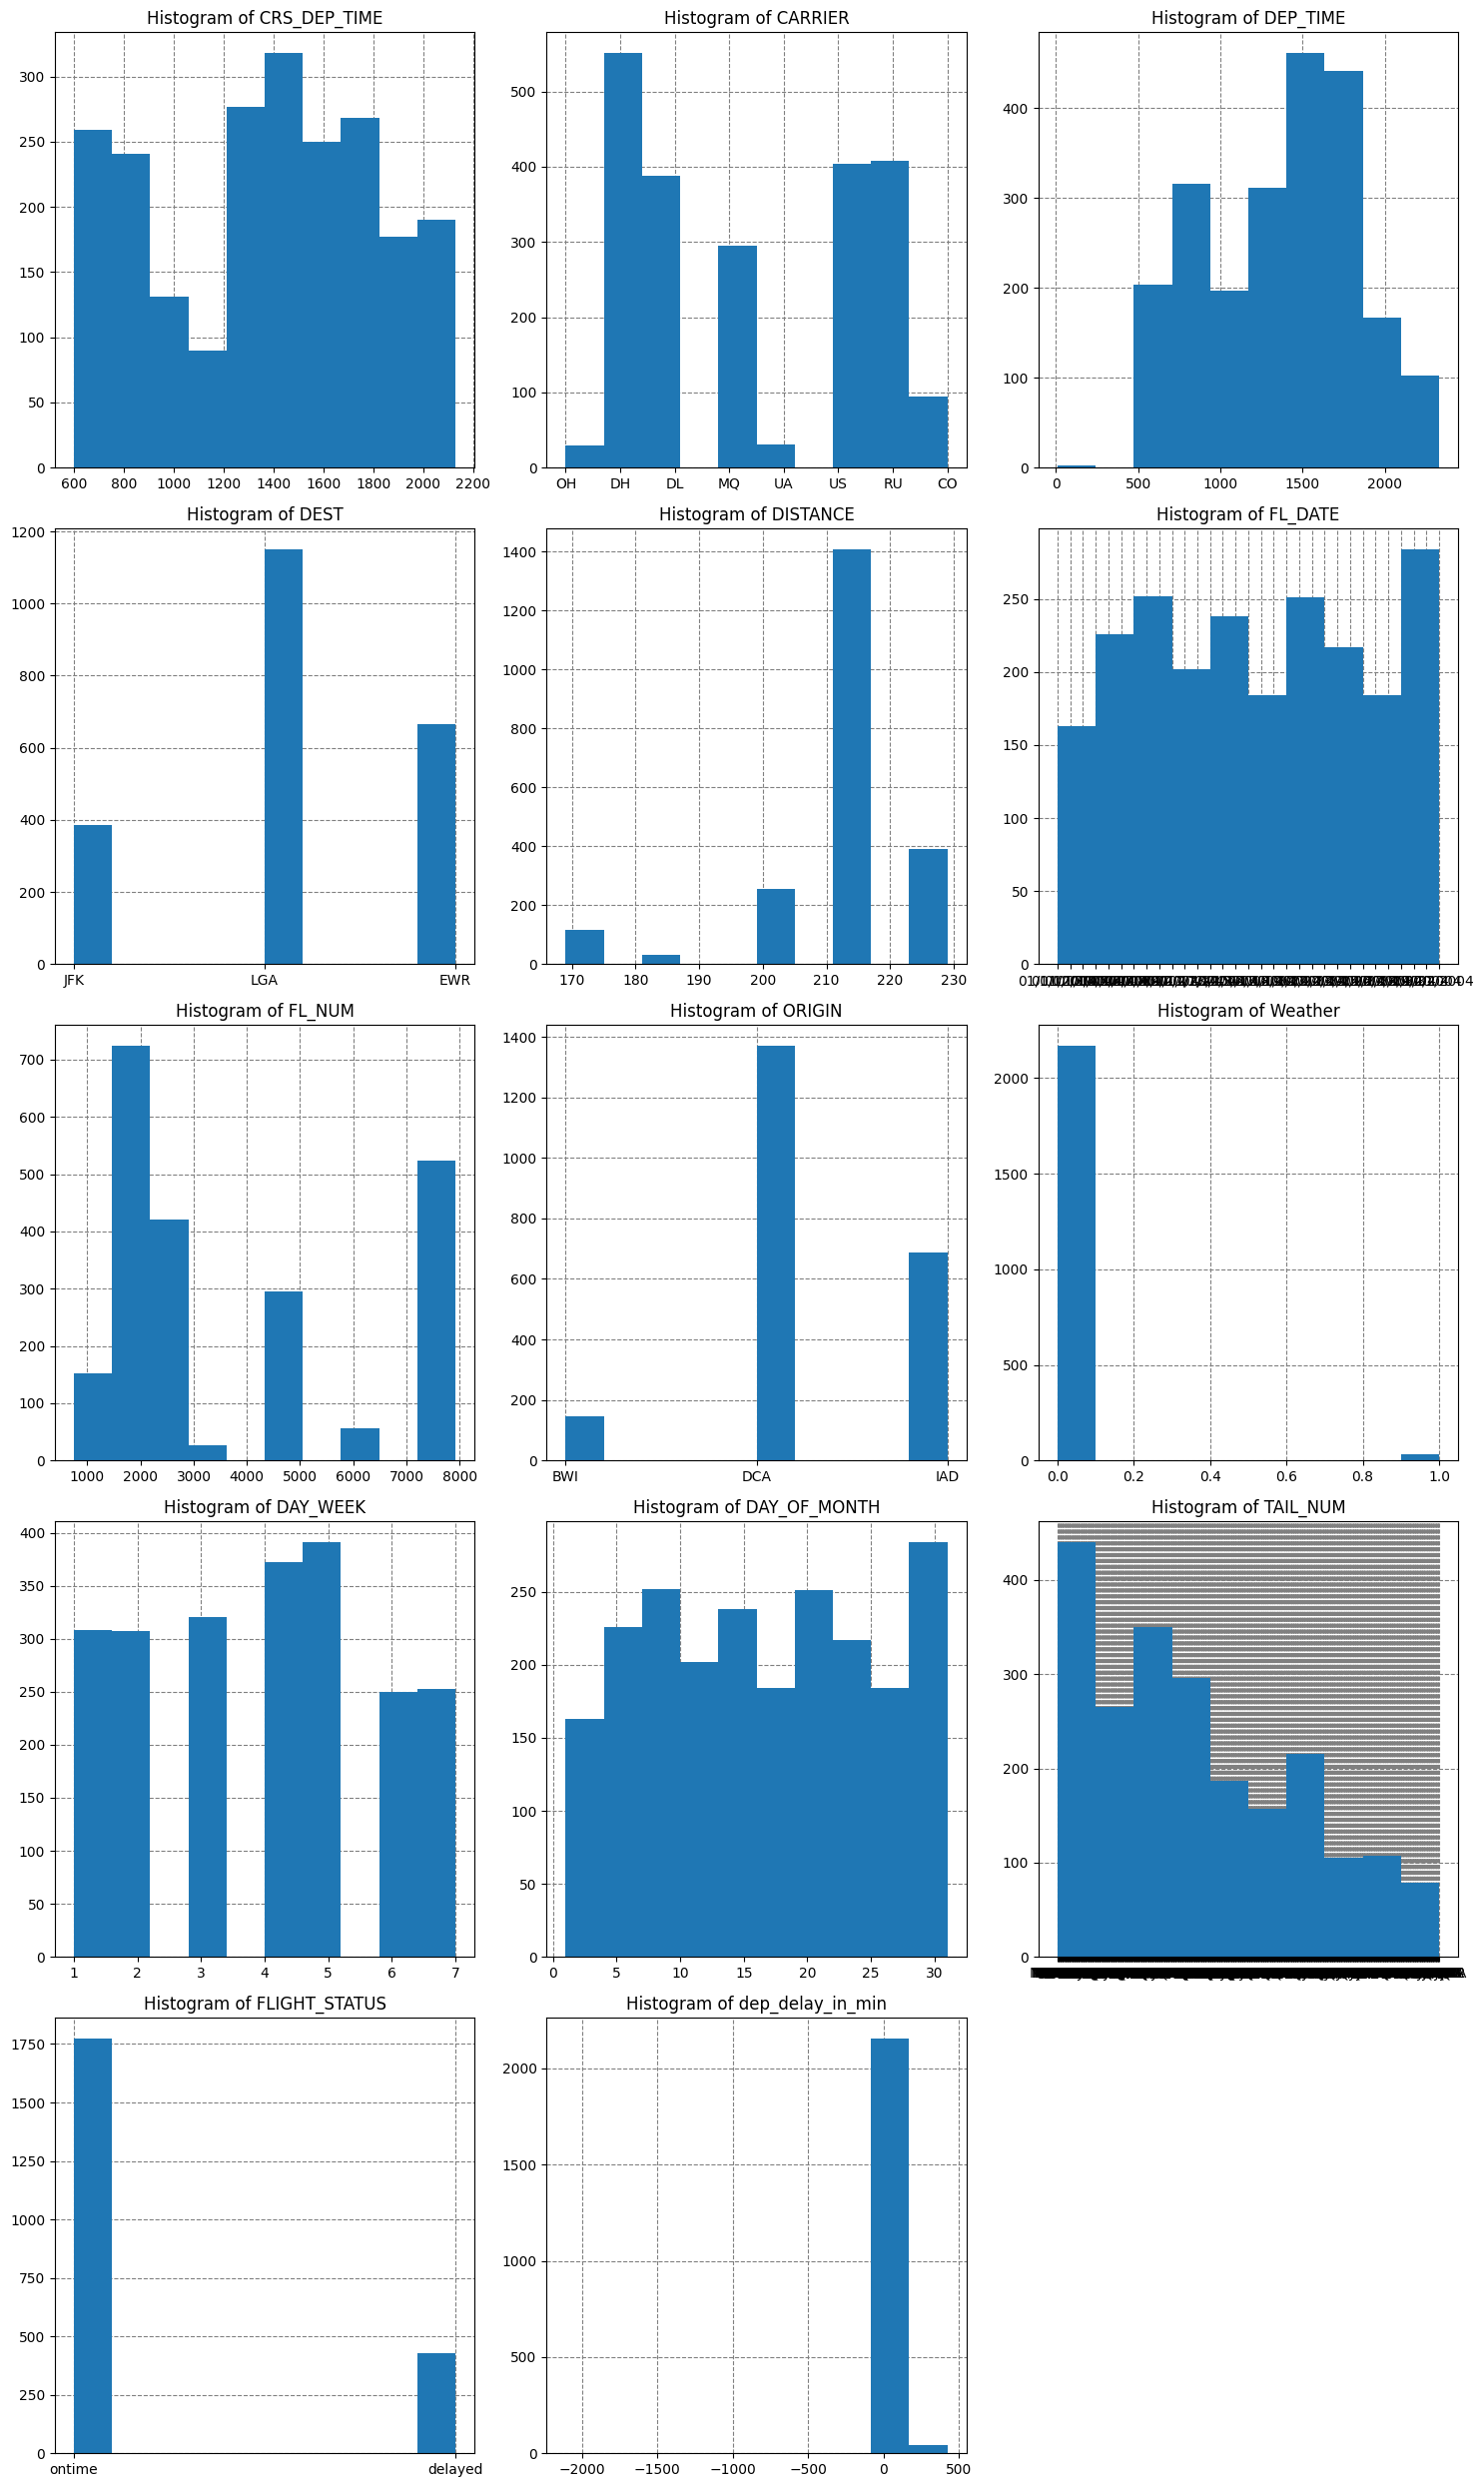

In [ ]:
# Histogram to overview the data

num_columns = 3
num_rows = math.ceil(len(delays_df.columns) / num_columns)

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5*num_rows))

axes = axes.flatten() if num_rows > 1 else [axes]

for i, column in enumerate(delays_df.columns):
    ax = axes[i]
    ax.hist(delays_df[column])
    ax.set_axisbelow(True)
    ax.grid(which='major', color='grey', linestyle='--')
    ax.set_title(f'Histogram of {column}')

for i in range(len(delays_df.columns), num_rows*num_columns):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

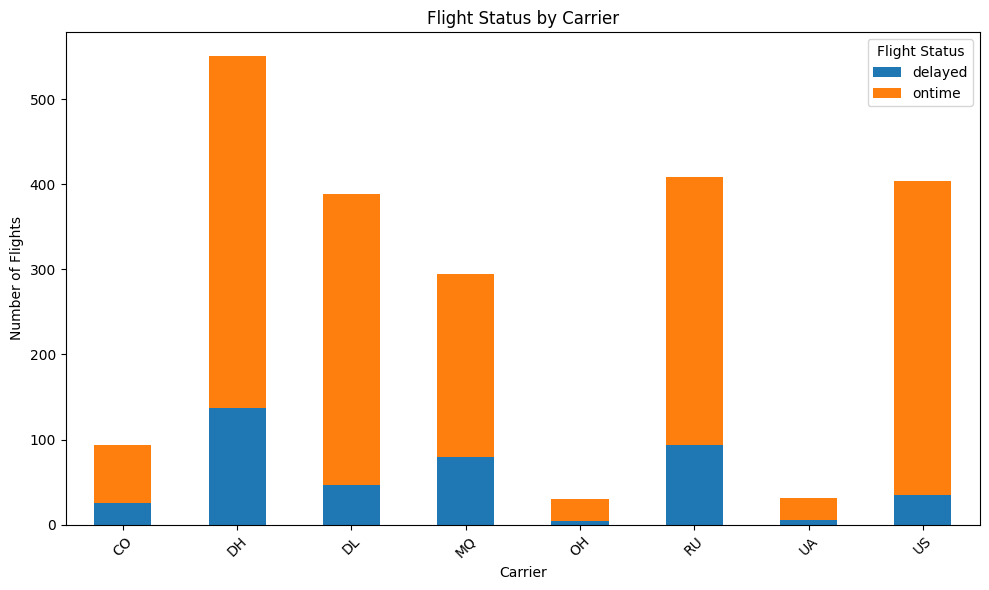

In [ ]:
# Counting the number of flights for each carrier and status
flight_counts = delays_df.groupby(['CARRIER', 'FLIGHT_STATUS']).size().unstack(fill_value=0)

# Plotting the stacked bar chart
flight_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Flight Status by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.legend(title='Flight Status')
plt.tight_layout()
plt.show()

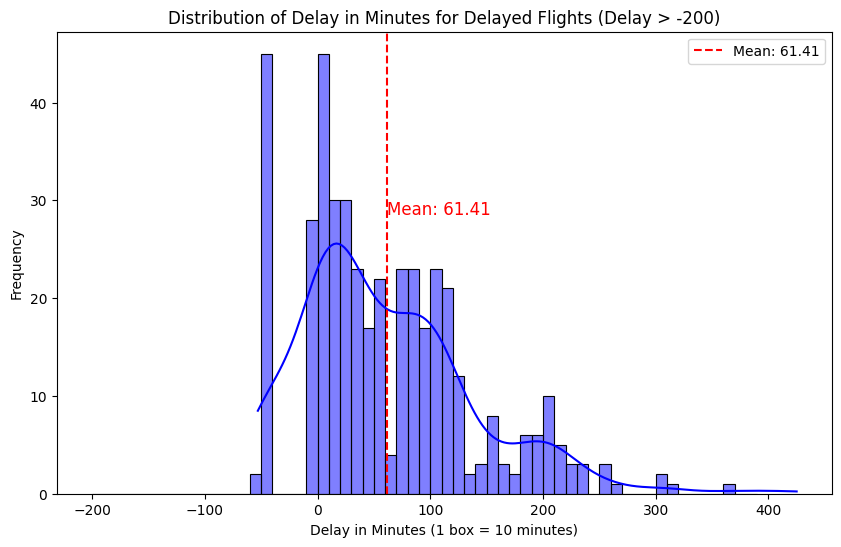

In [ ]:
# Filter the DataFrame to include only data where delay is more than -200
filtered_delays_df = delays_df[(delays_df['dep_delay_in_min'] > -200) & (delays_df['FLIGHT_STATUS'] == 'delayed')]


# Plotting distribution of delay in minutes
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=filtered_delays_df, x='dep_delay_in_min', bins=range(-200,400,10), kde=True, color='blue')

# Calculate mean delay
mean_delay = filtered_delays_df['dep_delay_in_min'].mean()

# Add vertical line for the mean
ax.axvline(mean_delay, color='red', linestyle='--', label=f'Mean: {mean_delay:.2f}')
ax.text(x=mean_delay, y=30, s=f'Mean: {mean_delay:.2f}', color='red', verticalalignment='top', fontsize=12)

# Set labels and title
plt.xlabel('Delay in Minutes (1 box = 10 minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Delay in Minutes for Delayed Flights (Delay > -200)')

# Show legend
plt.legend()

# Show the plot
plt.show()

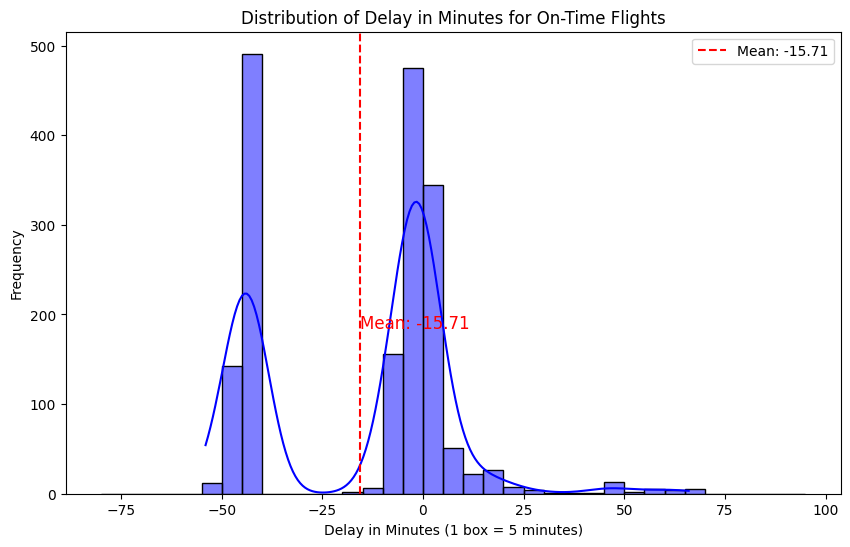

In [ ]:
# Filter the DataFrame to include only data where flight status is 'ontime'
filtered_ontime_df = delays_df[delays_df['FLIGHT_STATUS'] == 'ontime']

# Plotting distribution of delay in minutes
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=filtered_ontime_df, x='dep_delay_in_min', bins=range(-80, 100, 5), kde=True, color='blue')

# Calculate mean delay
mean_delay = filtered_ontime_df['dep_delay_in_min'].mean()

# Add vertical line for the mean
ax.axvline(mean_delay, color='red', linestyle='--', label=f'Mean: {mean_delay:.2f}')
ax.text(x=mean_delay, y=200, s=f'Mean: {mean_delay:.2f}', color='red', verticalalignment='top', fontsize=12)

# Set labels and title
plt.xlabel('Delay in Minutes (1 box = 5 minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Delay in Minutes for On-Time Flights')

# Show legend
plt.legend()

# Show the plot
plt.show()


# K-Nearest Neighbors

In [ ]:
# Make a copy for the analysis
delays_df1 = delays_df.copy()

In [ ]:
# Convert categorical variables into numerical form
label_encoders = {}
for column in ['CARRIER', 'DEST', 'FL_DATE', 'ORIGIN', 'TAIL_NUM', 'FLIGHT_STATUS']:
    label_encoders[column] = LabelEncoder()
    delays_df1[column] = label_encoders[column].fit_transform(delays_df1[column])

In [ ]:
# Define features and target variable
X = delays_df1.drop(columns=['FLIGHT_STATUS'])
y = delays_df1['FLIGHT_STATUS']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train.shape, X_test.shape)

(1760, 13) (441, 13)


In [ ]:
# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Initialize list to store accuracy for different k values
accuracies = []

# Loop through different k values
for k in range(1, 12):
    # Initialize k-NN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    
    # Train the classifier
    knn_classifier.fit(X_train, y_train)
    
    # Predictions
    y_pred = knn_classifier.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Print results
    print("Accuracy for k =", k, ":", accuracy)

Accuracy for k = 1 : 0.8458049886621315
Accuracy for k = 2 : 0.8321995464852607
Accuracy for k = 3 : 0.8798185941043084
Accuracy for k = 4 : 0.8707482993197279
Accuracy for k = 5 : 0.873015873015873
Accuracy for k = 6 : 0.8775510204081632
Accuracy for k = 7 : 0.8684807256235828
Accuracy for k = 8 : 0.8662131519274376
Accuracy for k = 9 : 0.8684807256235828
Accuracy for k = 10 : 0.873015873015873
Accuracy for k = 11 : 0.8662131519274376


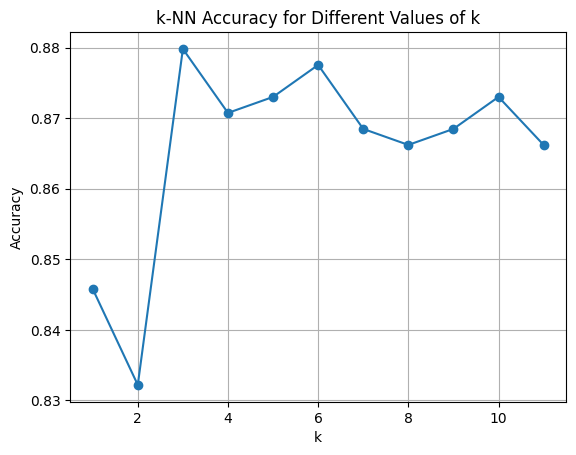

In [ ]:
# Plotting the results
import matplotlib.pyplot as plt

plt.plot(range(1, 12), accuracies, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k-NN Accuracy for Different Values of k')
plt.grid(True)

# Print results
plt.show()

# Naive Bayes Classifier

In [ ]:
# Make a copy for the analysis
delays_df2 = delays_df.copy()

In [ ]:
# Convert the day week column into categorical data
delays_df2.DAY_WEEK = delays_df2.DAY_WEEK.astype('category')

In [ ]:
# Create the necesary bins
delays_df2.CRS_DEP_TIME = [round(t / 100) for t in delays_df2.CRS_DEP_TIME]
delays_df2.CRS_DEP_TIME = delays_df2.CRS_DEP_TIME.astype('category')

In [ ]:
# Split the data into training (80%) and testing (20%)
predictors = ['DAY_WEEK', 'CRS_DEP_TIME', 'ORIGIN', 'DEST', 'CARRIER']
outcome = 'FLIGHT_STATUS'
X = pd.get_dummies(delays_df2[predictors])
y = delays_df2['FLIGHT_STATUS']
classes = ['ontime', 'delayed']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train.shape, X_valid.shape)

(1760, 37) (441, 37)


In [ ]:
# Calculate Naive Bayes Classifier
delays_nb = MultinomialNB(alpha=0.01)
delays_nb.fit(X_train, y_train)     

MultinomialNB(alpha=0.01)

In [ ]:
# Predict probabilities (Shows the belonging probabilities of each record to which class)
predProb_train = delays_nb.predict_proba(X_train)
predProb_valid = delays_nb.predict_proba(X_valid)

In [ ]:
# Predict class membership (shows the class instead of probability by selecting the class with highest probability)
y_valid_pred = delays_nb.predict(X_valid)
y_train_pred = delays_nb.predict(X_train)

In [ ]:
# Run the model to predict a new data
df = pd.concat([pd.DataFrame({'actual': y_valid, 'predicted': y_valid_pred})], axis=1)
mask = ((X_valid.CARRIER_DL == 1) & (X_valid.DAY_WEEK_7 == 1) & (X_valid.CRS_DEP_TIME_10 == 1) &
(X_valid.DEST_LGA == 1) & (X_valid.ORIGIN_DCA == 1))
print(df[mask])

      actual predicted
1748  ontime    ontime


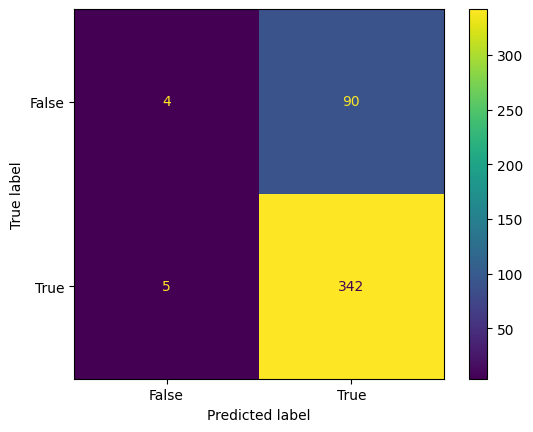

In [ ]:
# Confusion Matrix
confusion_matrix = metrics.confusion_matrix(df["actual"], df["predicted"])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

# Print results
cm_display.plot()

In [ ]:
# Analysis of the Naive Bayes

Accuracy = metrics.accuracy_score(df["actual"], df["predicted"])
Precision = metrics.precision_score(df["actual"], df["predicted"], pos_label='ontime')
Sensitivity_recall = metrics.recall_score(df["actual"], df["predicted"], pos_label='ontime')
Specificity = metrics.recall_score(df["actual"], df["predicted"], pos_label="delayed")

# Print results
print("The accuracy of the model is:", Accuracy)
print("The precision of the model is:", Precision)
print("The sensitivity of the model is:", Sensitivity_recall)
print("The specifity of the model is:", Specificity)

The accuracy of the model is: 0.7845804988662132
The precision of the model is: 0.7916666666666666
The sensitivity of the model is: 0.9855907780979827
The specifity of the model is: 0.0425531914893617


# Random Forest

In [ ]:
# Make a copy for the analysis
delays_df3 = delays_df

In [ ]:
# Convert categorical variables into numerical form
label_encoders = {}
for column in ['CARRIER', 'DEST', 'FL_DATE', 'ORIGIN', 'TAIL_NUM', 'FLIGHT_STATUS']:
    label_encoders[column] = LabelEncoder()
    delays_df3[column] = label_encoders[column].fit_transform(delays_df3[column])

In [ ]:
# Split the dataset into training and testing sets
X = delays_df3.drop(columns=['FLIGHT_STATUS'])
y = delays_df3['FLIGHT_STATUS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

print(X_train.shape, X_valid.shape)

(1760, 13) (441, 37)


In [ ]:
# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=5)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)

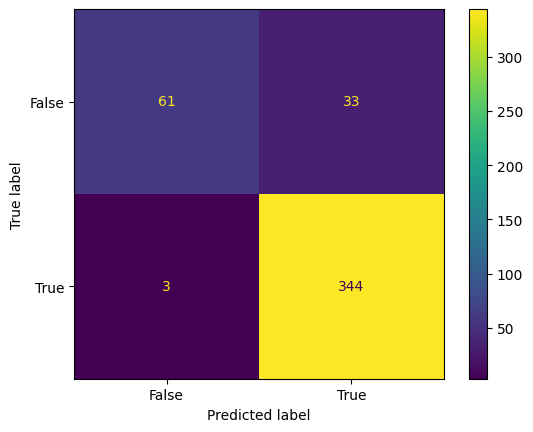

In [ ]:
# Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

# Print results
cm_display.plot()

In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9183673469387755
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.65      0.77        94
           1       0.91      0.99      0.95       347

    accuracy                           0.92       441
   macro avg       0.93      0.82      0.86       441
weighted avg       0.92      0.92      0.91       441



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ee5b5d88-9344-4581-82f2-6d5d93207c3b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>